In [1]:
import os
import shutil
import glob
import json
import time
import sys
from rm_tools.rM2svg import rm2svg
from rm_tools.rM2svg import extract_data
from PyPDF2 import PdfFileReader
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Set this up to work with the test example

There is one .rm file for every page. Each has its own hash. To find out the order we look into the content file. 

In [2]:
#refNrPath = "a4e0a733-41d6-4f1a-b5eb-c6c066be990b"
refNrPath =  "7df2543d-aabc-44ae-831f-b454b8458783"
#origPDF = "paper.pdf"
meta = json.loads(open(refNrPath + ".metadata").read())
content = json.loads(open(refNrPath + ".content").read())
fname = meta["visibleName"]
fname

'Test_penn'

## 1.+2. Loop through the number of pages, creating an annotation pdf for each.

In [41]:
pdflist = []
for pg, pg_hash in enumerate(content['pages']):
    # print(pg)
    rmpath = refNrPath + "/" + pg_hash + ".rm"
    if os.path.isfile(rmpath):
        rm2svg(rmpath, "tempDir/temprm" + str(pg) + ".svg", coloured_annotations=False)
        svg_path = "tempDir/temprm" + str(pg) + ".svg"
    else:
        svg_path = "tempDir/emptyrm.svg"
    convertSvg2PdfCmd = "".join(["rsvg-convert -f pdf -o ", "tempDir/temppdf" + str(pg), ".pdf ", svg_path])
    print(convertSvg2PdfCmd)
    os.system(convertSvg2PdfCmd)
    pdflist.append("tempDir/temppdf"+str(pg)+".pdf")

rsvg-convert -f pdf -o tempDir/temppdf0.pdf tempDir/temprm0.svg
rsvg-convert -f pdf -o tempDir/temppdf1.pdf tempDir/temprm1.svg
rsvg-convert -f pdf -o tempDir/temppdf2.pdf tempDir/temprm2.svg
rsvg-convert -f pdf -o tempDir/temppdf3.pdf tempDir/temprm3.svg
rsvg-convert -f pdf -o tempDir/temppdf4.pdf tempDir/temprm4.svg
rsvg-convert -f pdf -o tempDir/temppdf5.pdf tempDir/temprm5.svg


In [4]:
str(tuple([35]*3))

'(35, 35, 35)'

## 3. merge all pdf pages into one

In [5]:
#merged_rm = "tempDir/merged_rm.pdf"
#os.system("convert "+ (" ").join(pdflist)+" "+merged_rm)

## 4. overlay on top of the existing page

In [6]:
#stampCmd = "".join(["pdftk ", origPDF, " multistamp ", merged_rm, #" output ", origPDF[:-4], "_annot.pdf"])
#os.system(stampCmd)

# ANALYZE PENS

In [7]:
pages=[]
for pg, pg_hash in enumerate(content['pages']):
    print(pg_hash)
    rmpath = refNrPath + "/" + pg_hash + ".rm"
    
    if os.path.isfile(rmpath):
      mylist = extract_data(rmpath)
    pages.append(mylist)
    

9e465c3e-f99e-49a7-8d97-a37ebced69b1
4e65a642-edb0-445d-a62a-8c2fd52d8ba9
e9b4b670-5406-4df8-89d5-4067da1f1692
781ee32e-7e33-47b1-be67-b42fdcb506e1
c10f5c10-b97a-44e4-93ce-8da1cf8bc9b3
f69b0fc0-aa2d-4ce9-8820-4281f593a692


# Pen types

In [8]:
pens_df = pd.DataFrame(pages[5], columns = ["pen", "colour", "i_unk", "width", "i_unk4", "nsegments", "xpos", "ypos", "pressure", "tilt", "i_unk2", "i_unk3"])  

In [9]:
pens_df.head()

,pen,colour,i_unk,width,i_unk4,nsegments,xpos,ypos,pressure,tilt,i_unk2,i_unk3
0,15,0,0,2.0,0.0,27,64.173965,185.159103,0.161084,6.250025,2.962963,0.000000
1,15,0,0,2.0,0.0,27,66.014771,184.211517,1.001626,5.722168,2.962963,0.000000
2,15,0,0,2.0,0.0,27,65.110016,183.209549,0.026139,2.894490,2.962963,0.001766
3,15,0,0,2.0,0.0,27,65.072334,183.090195,0.106244,3.943697,2.962963,0.068893
4,15,0,0,2.0,0.0,27,65.166679,182.946350,0.074035,5.104358,2.962963,0.165100


In [10]:
pens_df["pen2"] = "caligraphy"
#pens_df.loc[pens_df.ypos<500, "pen2"] = "hasdasdi"
pens_df.loc[pens_df.ypos<1300, "pen2"] = "hi"
pens_df.loc[pens_df.ypos<1100, "pen2"] = "brush"
pens_df.loc[pens_df.ypos<900, "pen2"] = "mech"
pens_df.loc[pens_df.ypos<700, "pen2"] = "pencil"
pens_df.loc[pens_df.ypos<550,"pen2"] = "marker"
pens_df.loc[pens_df.ypos<400,"pen2"] = "finleliner"
pens_df.loc[pens_df.ypos<250,"pen2"] = "ballpoint"

pens_df["thickness"] = "none"
pens_df.loc[pens_df.xpos>350, "thickness"] = "thin"
pens_df.loc[pens_df.xpos>650, "thickness"] = "med"
pens_df.loc[pens_df.xpos>850, "thickness"] = "thick"

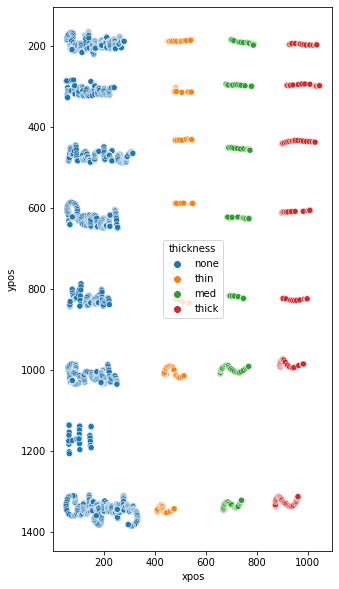

In [11]:
plt.figure(figsize=(5, 10))
sns.scatterplot(data=pens_df, x="xpos", y="ypos", hue="thickness")
plt.gca().invert_yaxis()


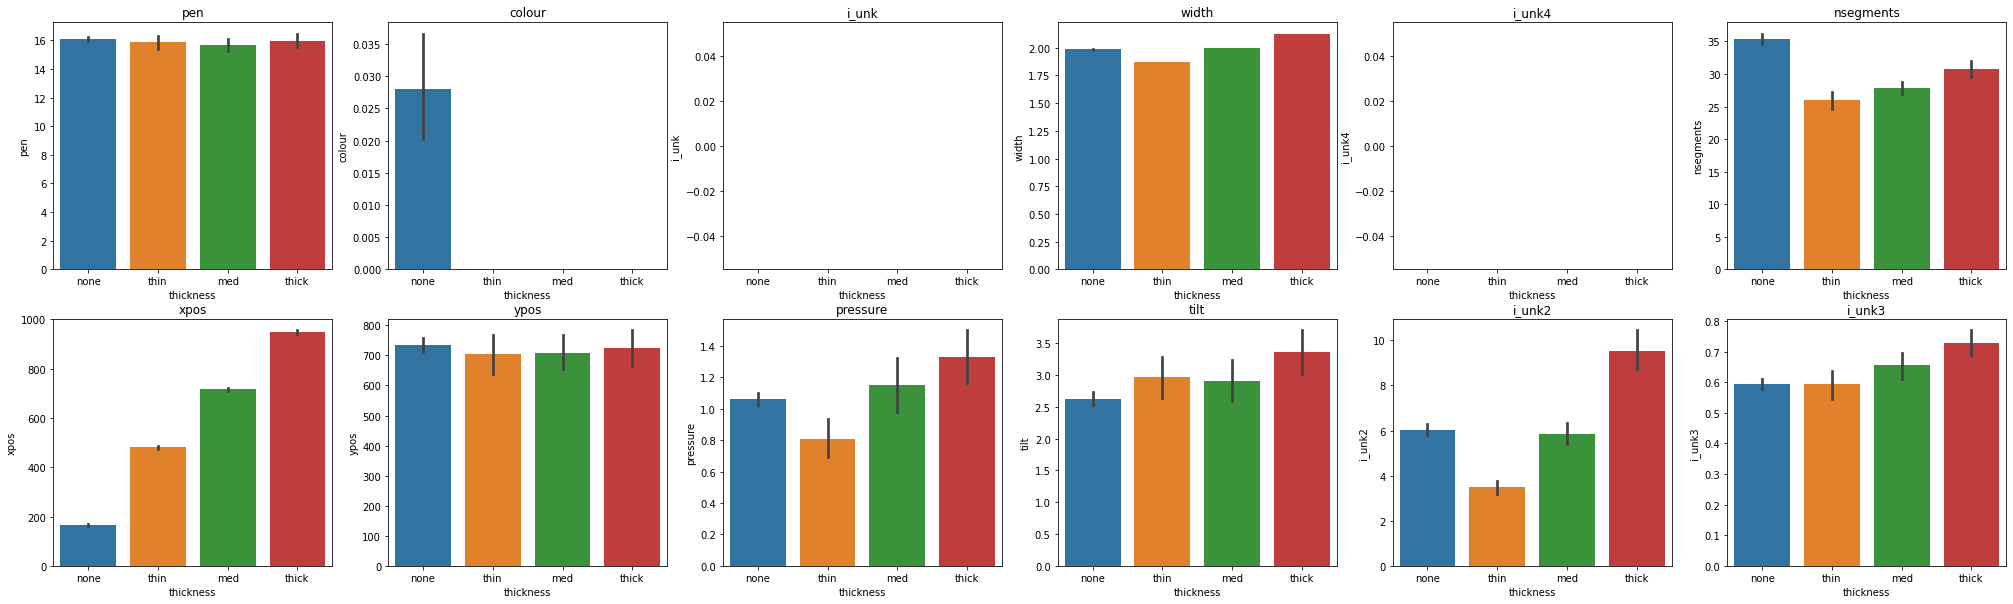

In [12]:
fig, ax = plt.subplots(2, 6, figsize=(35,10))
ax = ax.ravel()
for i, col in enumerate(pens_df.columns):
    #print(i)
    if i >= 12:
      continue
    sns.barplot(data=pens_df, y=col, x="thickness", ax=ax[i])
    ax[i].set_title(col)

In [13]:
mframe = pens_df.groupby(["thickness", "pen2"]).mean()
mframe

pen  colour  i_unk  width  i_unk4  nsegments  \
thickness pen2                                                        
med       ballpoint   15.0     0.0    0.0  2.000     0.0  32.000000   
          brush       12.0     0.0    0.0  2.000     0.0  32.000000   
          caligraphy  21.0     0.0    0.0  2.000     0.0  35.000000   
          finleliner  17.0     0.0    0.0  2.000     0.0  20.000000   
          marker      16.0     0.0    0.0  2.000     0.0  23.000000   
          mech        13.0     0.0    0.0  2.000     0.0  16.000000   
          pencil      14.0     0.0    0.0  2.000     0.0  26.000000   
none      ballpoint   15.0     0.0    0.0  2.000     0.0  31.898462   
          brush       12.0     0.0    0.0  2.125     0.0  35.175258   
          caligraphy  21.0     0.0    0.0  1.875     0.0  49.188034   
          finleliner  17.0     0.0    0.0  2.000     0.0  30.250000   
          hi          18.0     1.0    0.0  2.000     0.0   8.813953   
          marker      16.0     0.0    0.0  2.000     0.0  36.016575   
          mech        13.0     0.0    0.0  2.000     0.0  29.125000   
          pencil      14.0     0.0    0.0  2.000     0.0  28.857868   
thick     ballpoint   15.0     0.0    0.0  2.125     0.0  34.000000   
          brush       12.0     0.0    0.0  2.125     0.0  30.000000   
          caligraphy  21.0     0.0    0.0  2.125     0.0  45.000000   
          finleliner  17.0     0.0    0.0  2.125     0.0  20.000000   
          marker      16.0     0.0    0.0  2.125     0.0  29.000000   
          mech        13.0     0.0    0.0  2.125     0.0  20.000000   
          pencil      14.0     0.0    0.0  2.125     0.0  18.000000   
thin      ballpoint   15.0     0.0    0.0  1.875     0.0  34.000000   
          brush       12.0     0.0    0.0  1.875     0.0  28.000000   
          caligraphy  21.0     0.0    0.0  1.875     0.0  36.000000   
          finleliner  17.0     0.0    0.0  1.875     0.0  12.428571   
          marker      16.0     0.0    0.0  1.875     0.0  21.000000   
          mech        13.0     0.0    0.0  1.875     0.0  15.000000   
          pencil      14.0     0.0    0.0  1.875     0.0  18.000000   

                            xpos         ypos  pressure      tilt     i_unk2  \
thickness pen2                                                                 
med       ballpoint   736.381599   190.477395  0.521124  2.139930   3.498471   
          brush       700.175632   999.075171  1.932796  3.574239   9.243532   
          caligraphy  698.111267  1335.425419  1.487681  3.560794   2.104207   
          finleliner  731.917059   298.218683  1.143732  2.762186   4.000000   
          marker      725.904583   454.232655  0.668327  2.341019  11.695353   
          mech        712.091152   819.278549  1.057220  2.847598   5.925926   
          pencil      716.939866   624.592536  1.027182  2.801769   5.853132   
none      ballpoint   159.496948   195.692445  0.832310  2.514690   3.530095   
          brush       147.321032  1016.825582  1.092933  2.591444   9.099326   
          caligraphy  199.953696  1343.223982  1.266588  2.589456   2.087357   
          finleliner  141.680255   311.214422  0.849029  2.537518   4.000000   
          hi          107.044664  1164.234401  1.279490  2.245653  30.000000   
          marker      181.823064   472.621584  0.930106  3.036480  11.410673   
          mech        142.472016   826.695829  1.241891  2.912978   5.925926   
          pencil      151.587932   628.111756  1.154313  2.526310   5.453211   
thick     ballpoint   971.154767   197.407576  0.544300  2.678001   5.835374   
          brush       919.790391   985.431921  1.440059  3.739875  11.128590   
          caligraphy  908.908948  1325.577363  1.587165  3.092146   3.893408   
          finleliner  996.475717   298.134628  1.029092  3.132081   6.000000   
          marker      963.259399   438.147666  1.616307  3.359510  20.399634   
          mech        967.050214   825.716986  1.462040  3.82

okay, so we found the following:
- col 1 is pen
- col 4 is the base width
- the first 6 cols have no variance

# Tilt and pressure markers

In [14]:
df = pd.DataFrame(pages[4], columns = ["pen", "colour", "unknown1", "base_width", "unknown2", "nsegments", "xpos", "ypos", "speed", "tilt?", "width?", "pressure"])  

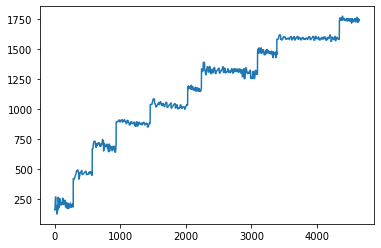

In [15]:
plt.plot(df.ypos)

In [16]:
df["line"] = "no_pressure_straight"
df.loc[df.ypos<1650, "line"] = "pressure_straight"
df.loc[df.ypos<1550, "line"] = "no_pressure_tilt"
df.loc[df.ypos<1400, "line"] = "pressure_tilt"
df.loc[df.ypos<1250, "line"] = "no_pressure"
df.loc[df.ypos<1100, "line"] = "pressure"
df.loc[df.ypos<980,"line"] = "not_tilted"
df.loc[df.ypos<800,"line"] = "tilted"
df.loc[df.ypos<600,"line"] = "slow"
df.loc[df.ypos<400,"line"] = "fast"

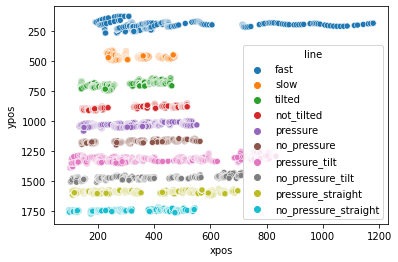

In [17]:
sns.scatterplot(data=df, x="xpos", y="ypos", hue="line")
plt.gca().invert_yaxis()
#plt.legend()

In [18]:
df.head()

,pen,colour,unknown1,base_width,unknown2,nsegments,xpos,ypos,speed,tilt?,width?,pressure,line
0,21,0,0,2.125,0.0,16,220.933624,158.914551,0.146909,6.270306,3.0,0.0,fast
1,21,0,0,2.125,0.0,16,223.557892,159.053619,2.627950,0.052944,3.0,0.0,fast
2,21,0,0,2.125,0.0,16,226.054062,159.625946,2.560942,0.225386,3.0,0.0,fast
3,21,0,0,2.125,0.0,16,224.718567,162.809738,1.923016,1.896203,3.0,0.0,fast
4,21,0,0,2.125,0.0,16,224.311584,166.465057,3.677906,1.681679,3.0,0.0,fast


In [19]:
mframe = df.groupby("line").mean()
mframe

,pen,colour,unknown1,base_width,unknown2,nsegments,xpos,ypos,speed,tilt?,width?,pressure
line,,,,,,,,,,,,
fast,21.0,0.0,0.0,2.125,0.0,35.021277,458.060153,200.821989,4.486261,3.067487,3.808322,0.414357
no_pressure,21.0,0.0,0.0,2.125,0.0,20.085714,351.797706,1169.694974,1.089643,2.712731,3.004769,0.009568
no_pressure_straight,21.0,0.0,0.0,2.000,0.0,17.666667,320.215433,1747.970318,0.798781,2.876146,2.002469,0.000843
no_pressure_tilt,21.0,0.0,0.0,2.000,0.0,37.040678,371.211166,1476.203361,1.199860,3.070101,2.007774,0.003185
not_tilted,21.0,0.0,0.0,2.125,0.0,48.884393,338.194404,885.277787,0.498321,2.281520,5.723808,0.552208
pressure,21.0,0.0,0.0,2.125,0.0,64.951049,322.280784,1033.478026,1.007527,2.600461,6.092950,0.919109
pressure_straight,21.0,0.0,0.0,2.000,0.0,53.798742,378.198941,1593.354768,0.749057,2.653031,4.208316,0.908355
pressure_tilt,21.0,0.0,0.0,2.000,0.0,72.509346,433.139128,1316.898651,1.363367,2.750141,4.082674,0.884969
slow,21.0,0.0,0.0,2.125,0.0,75.151724,338.552718,460.582108,0.574159,2.195805,4.871316,0.403175


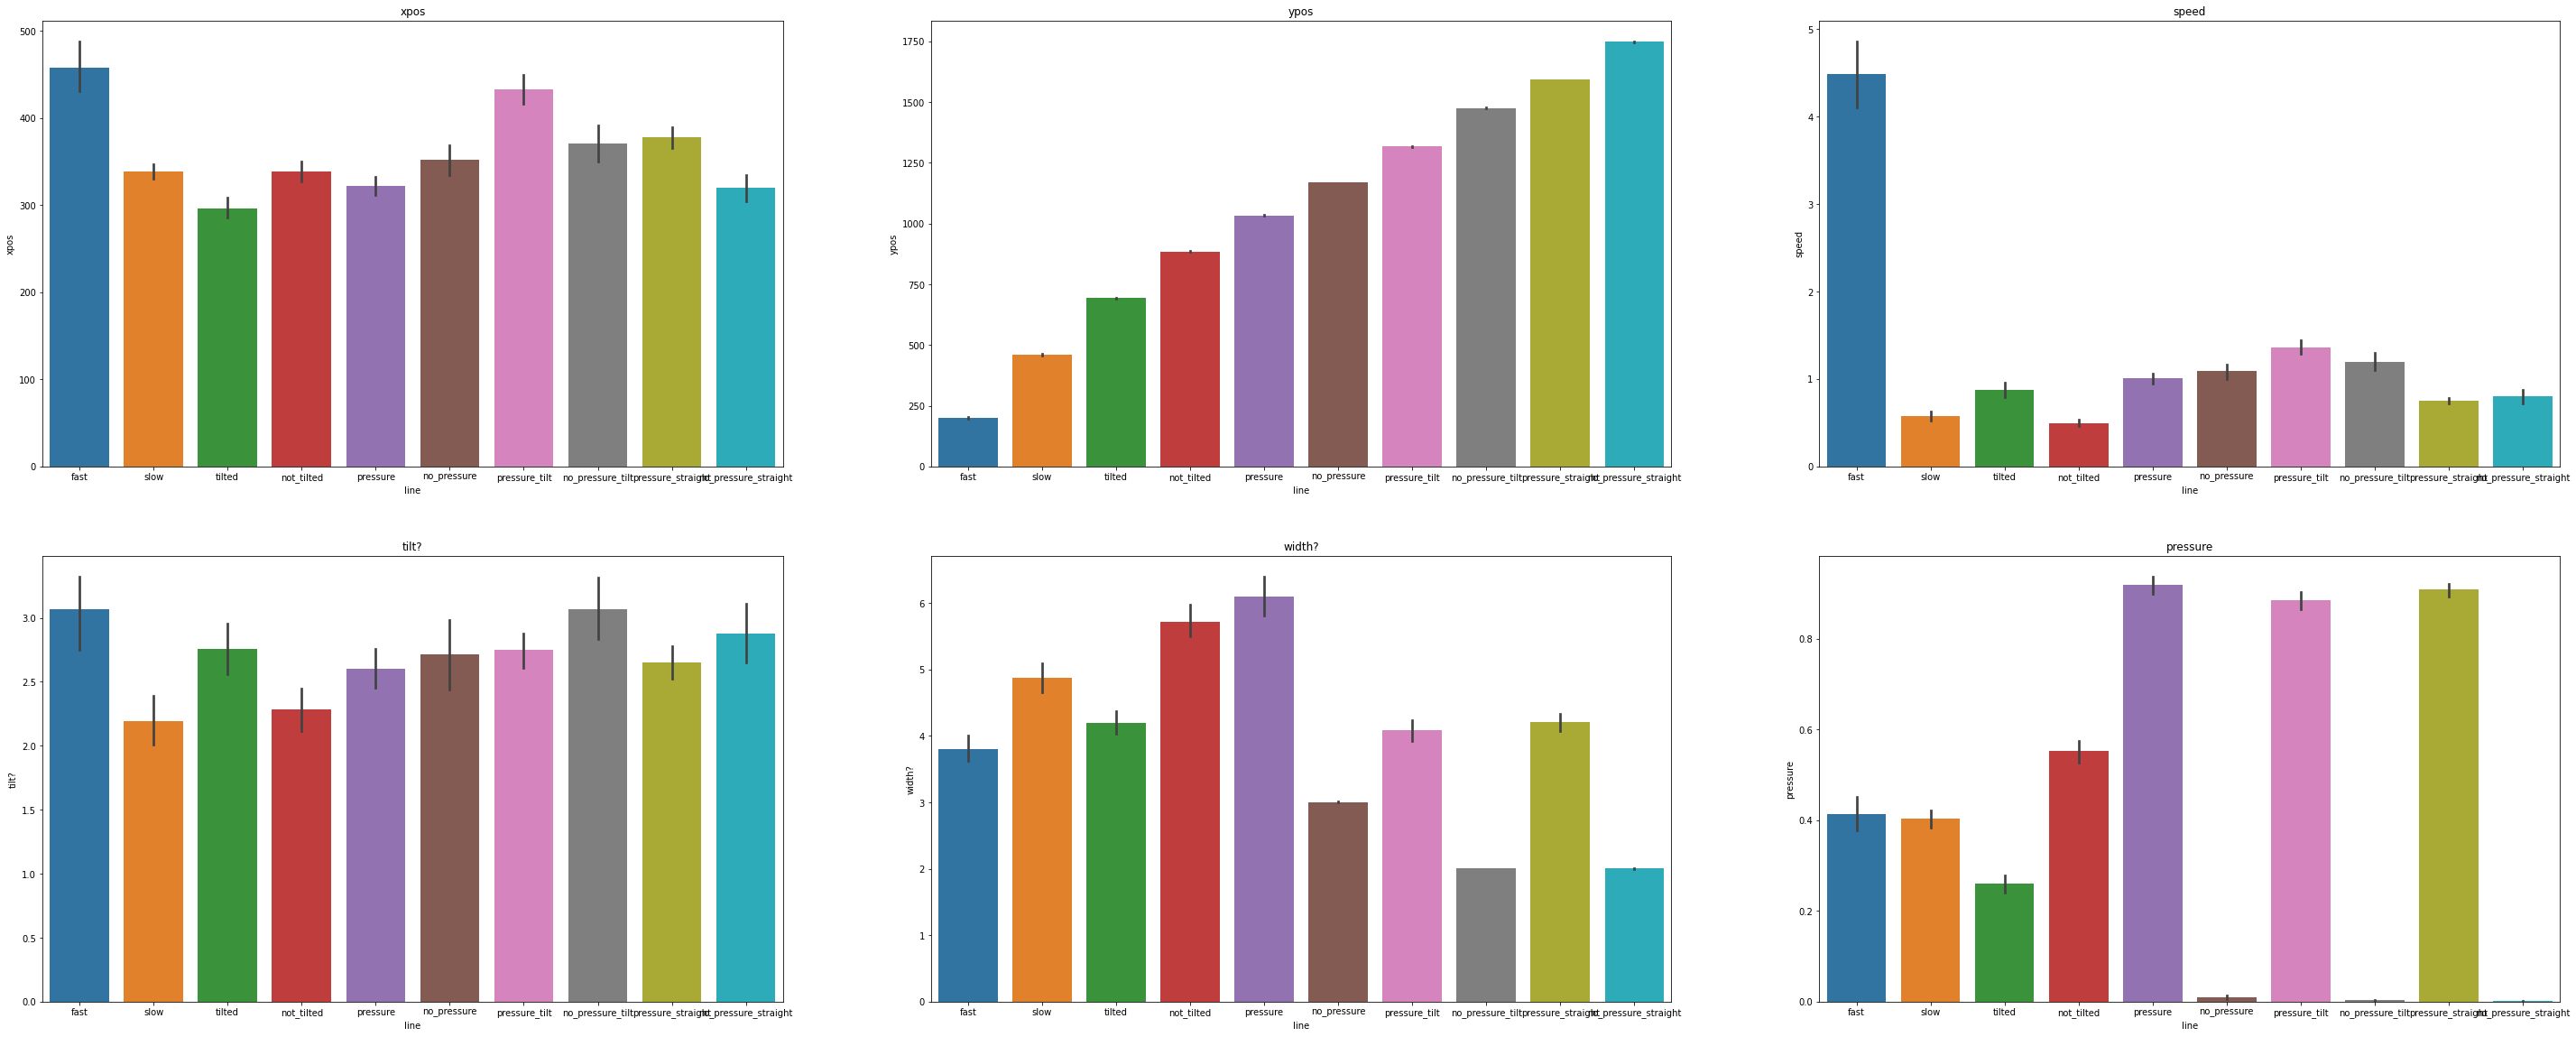

In [20]:
fig, ax = plt.subplots(2, 3, figsize=(50,20))
ax = ax.ravel()
plt_ix = 0
for i, col in enumerate(df.columns):
    #print(i)
    if i <= 5:
      continue
    if i >= 12:
      continue
    sns.barplot(data=df, y=col, x="line", ax=ax[plt_ix])
    ax[plt_ix].set_title(col)
    plt_ix+=1

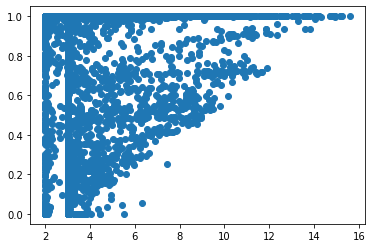

In [21]:
plt.scatter(df["width?"], df.pressure)

In [22]:
df_short = df.loc[:,["speed", "tilt?", "width?", "pressure"]]
df_short.head()

,speed,tilt?,width?,pressure
0,0.146909,6.270306,3.0,0.0
1,2.627950,0.052944,3.0,0.0
2,2.560942,0.225386,3.0,0.0
3,1.923016,1.896203,3.0,0.0
4,3.677906,1.681679,3.0,0.0


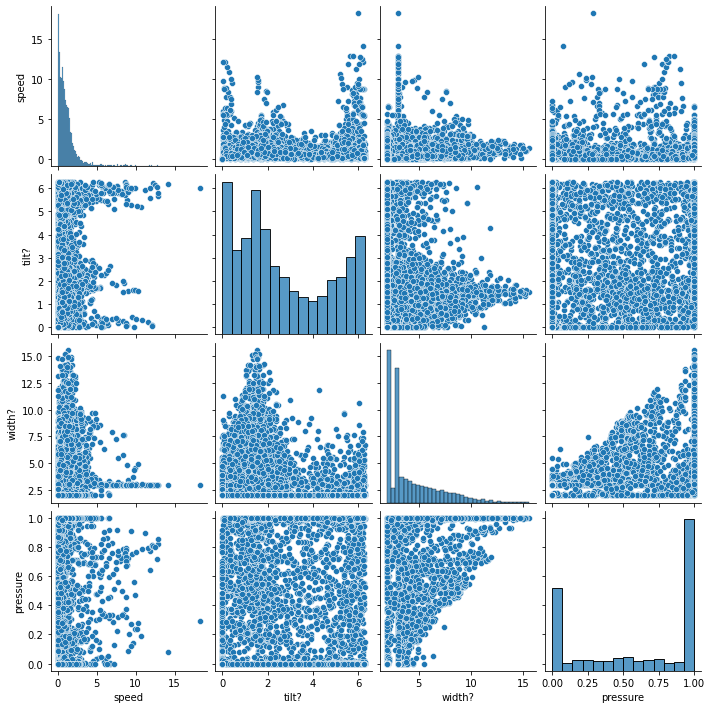

In [23]:
sns.pairplot(df_short)

<AxesSubplot:xlabel='pressure', ylabel='Density'>

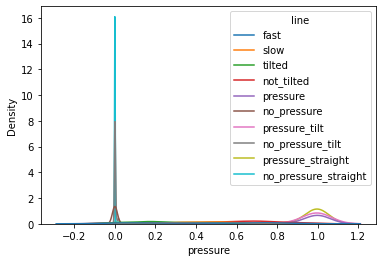

In [24]:
sns.kdeplot(df["pressure"], hue=df["line"])

In [25]:
df["pressure"].max()

1.0

<AxesSubplot:xlabel='width?', ylabel='Density'>

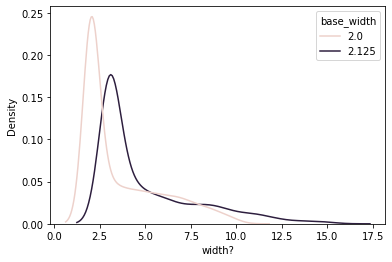

In [26]:
sns.kdeplot(df["width?"], hue=df["base_width"])

In [27]:
df["am_i_pressed"] = "None"
df.loc[df.line=="pressure", "am_i_pressed"] = "Y"
df.loc[df.line=="pressure_tilt", "am_i_pressed"] = "Y"
df.loc[df.line=="pressure_straight", "am_i_pressed"] = "Y"
df.loc[df.line=="no_pressure", "am_i_pressed"] = "N"
df.loc[df.line=="no_pressure_tilt", "am_i_pressed"] = "N"
df.loc[df.line=="no_pressure_straight", "am_i_pressed"] = "N"

In [28]:
df["am_i_tilted"] = "None"
df.loc[df.line=="tilted", "am_i_tilted"] = "Y"
df.loc[df.line=="pressure_tilt", "am_i_tilted"] = "Y"
df.loc[df.line=="no_pressure_tilt", "am_i_tilted"] = "Y"
df.loc[df.line=="not_tilted", "am_i_tilted"] = "N"
df.loc[df.line=="pressure_straight", "am_i_tilted"] = "N"
df.loc[df.line=="no_pressure_straight", "am_i_tilted"] = "N"

<AxesSubplot:xlabel='pressure', ylabel='Density'>

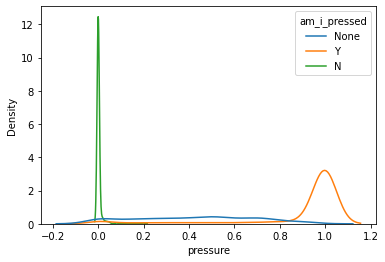

In [29]:
sns.kdeplot(df["pressure"], hue=df["am_i_pressed"])

<AxesSubplot:xlabel='tilt?', ylabel='Density'>

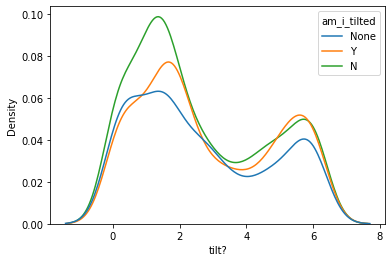

In [30]:
sns.kdeplot(df["tilt?"], hue=df["am_i_tilted"])

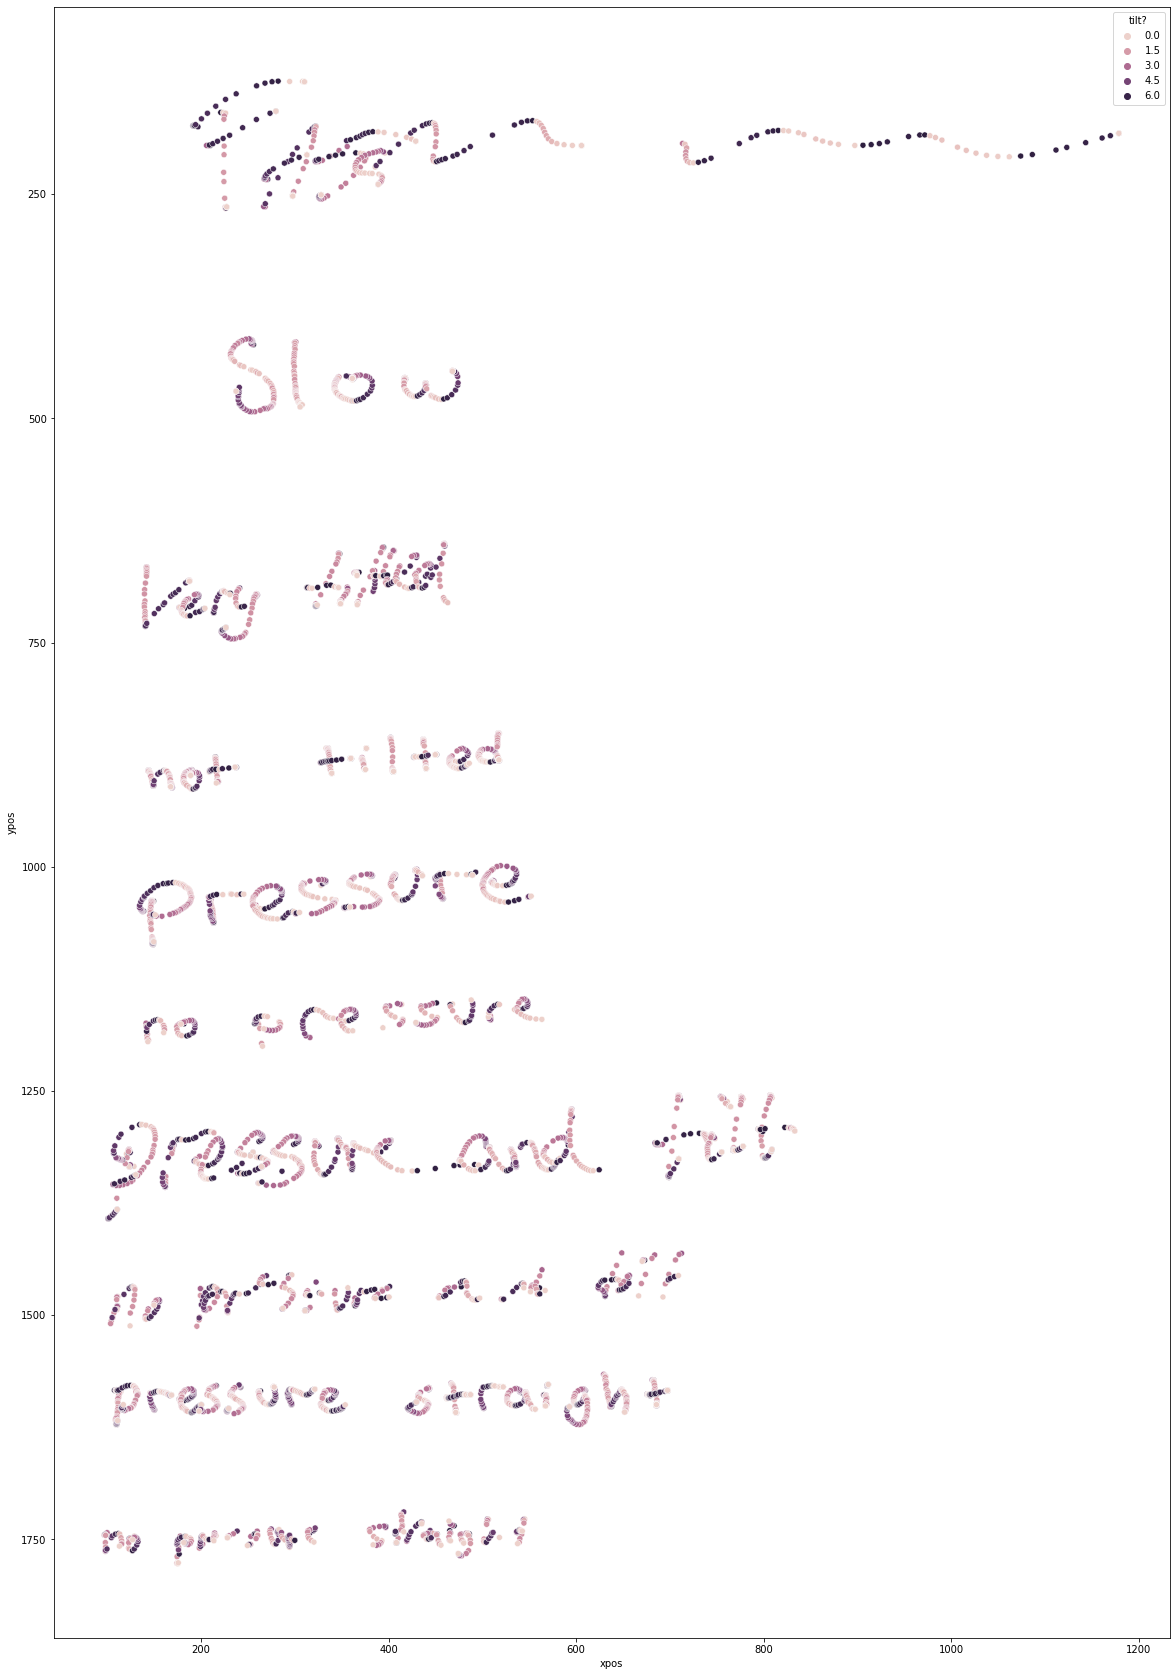

In [31]:
plt.figure(figsize=(20, 30))
sns.scatterplot(data=df, x="xpos", y="ypos", hue="tilt?")
plt.gca().invert_yaxis()

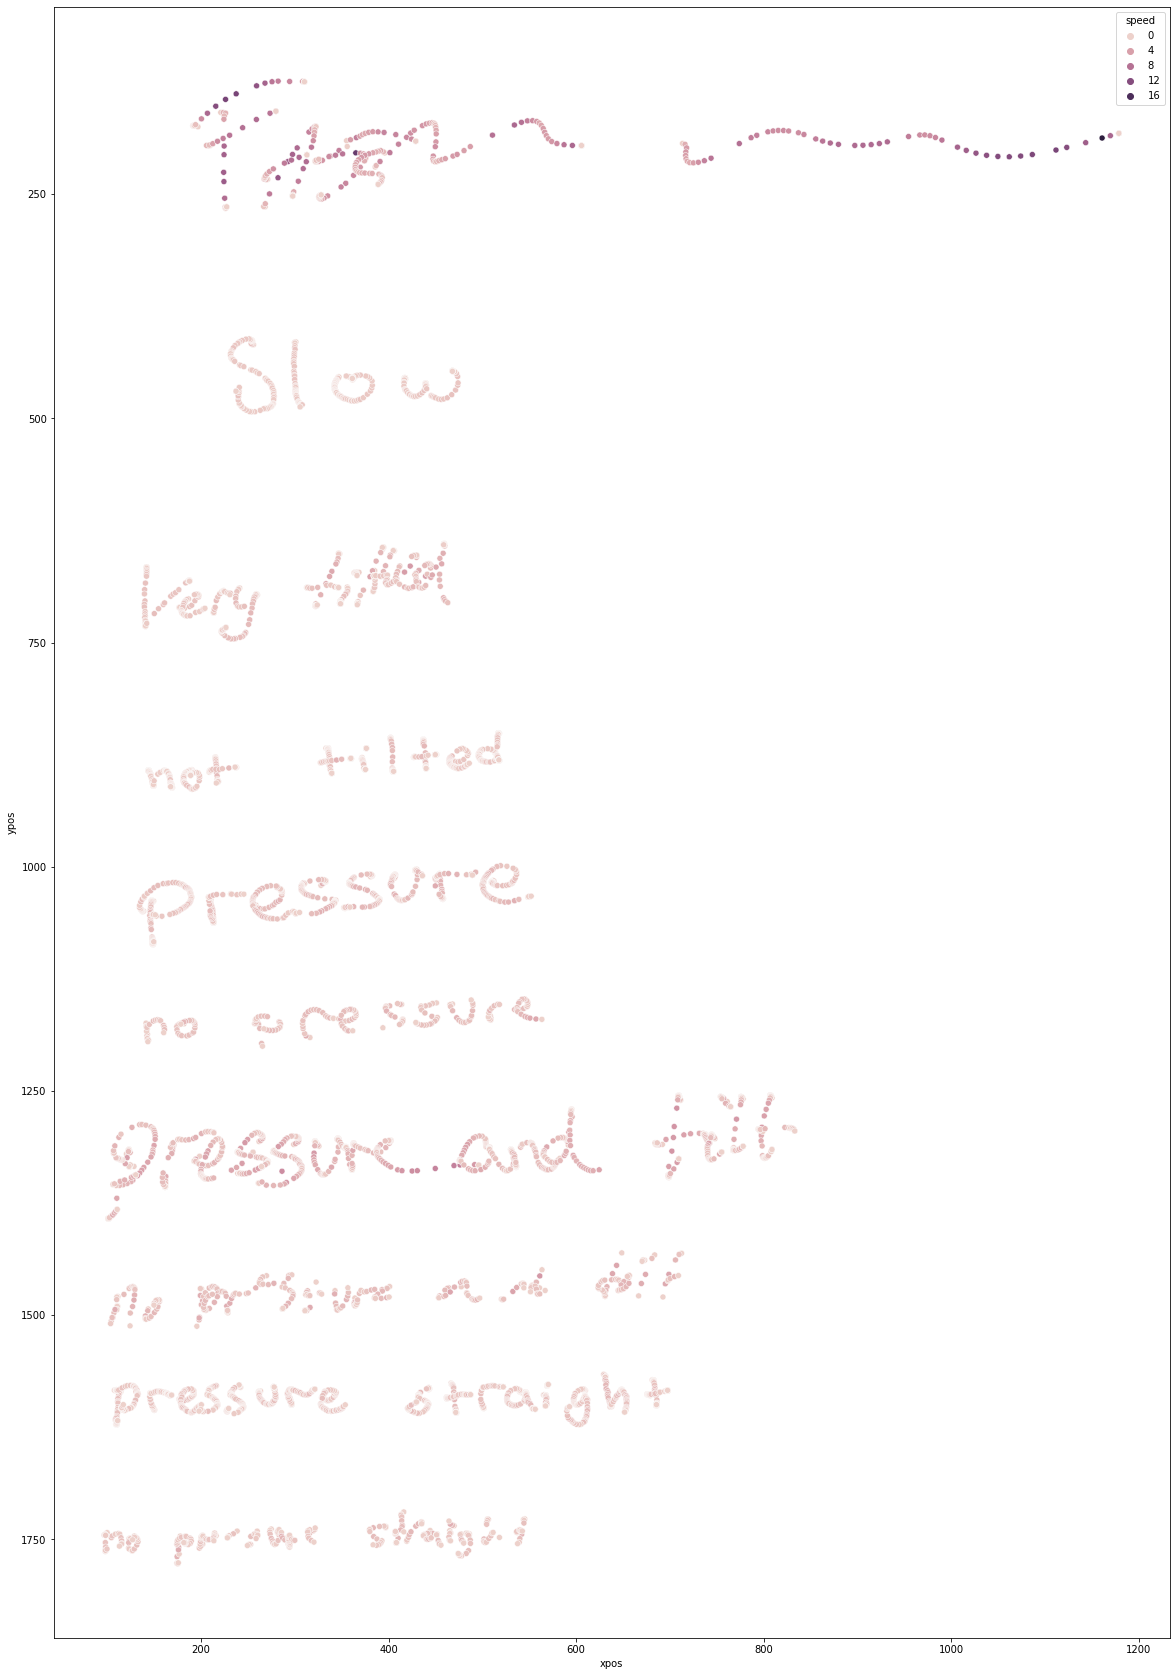

In [32]:
plt.figure(figsize=(20, 30))
sns.scatterplot(data=df, x="xpos", y="ypos", hue="speed")
plt.gca().invert_yaxis()

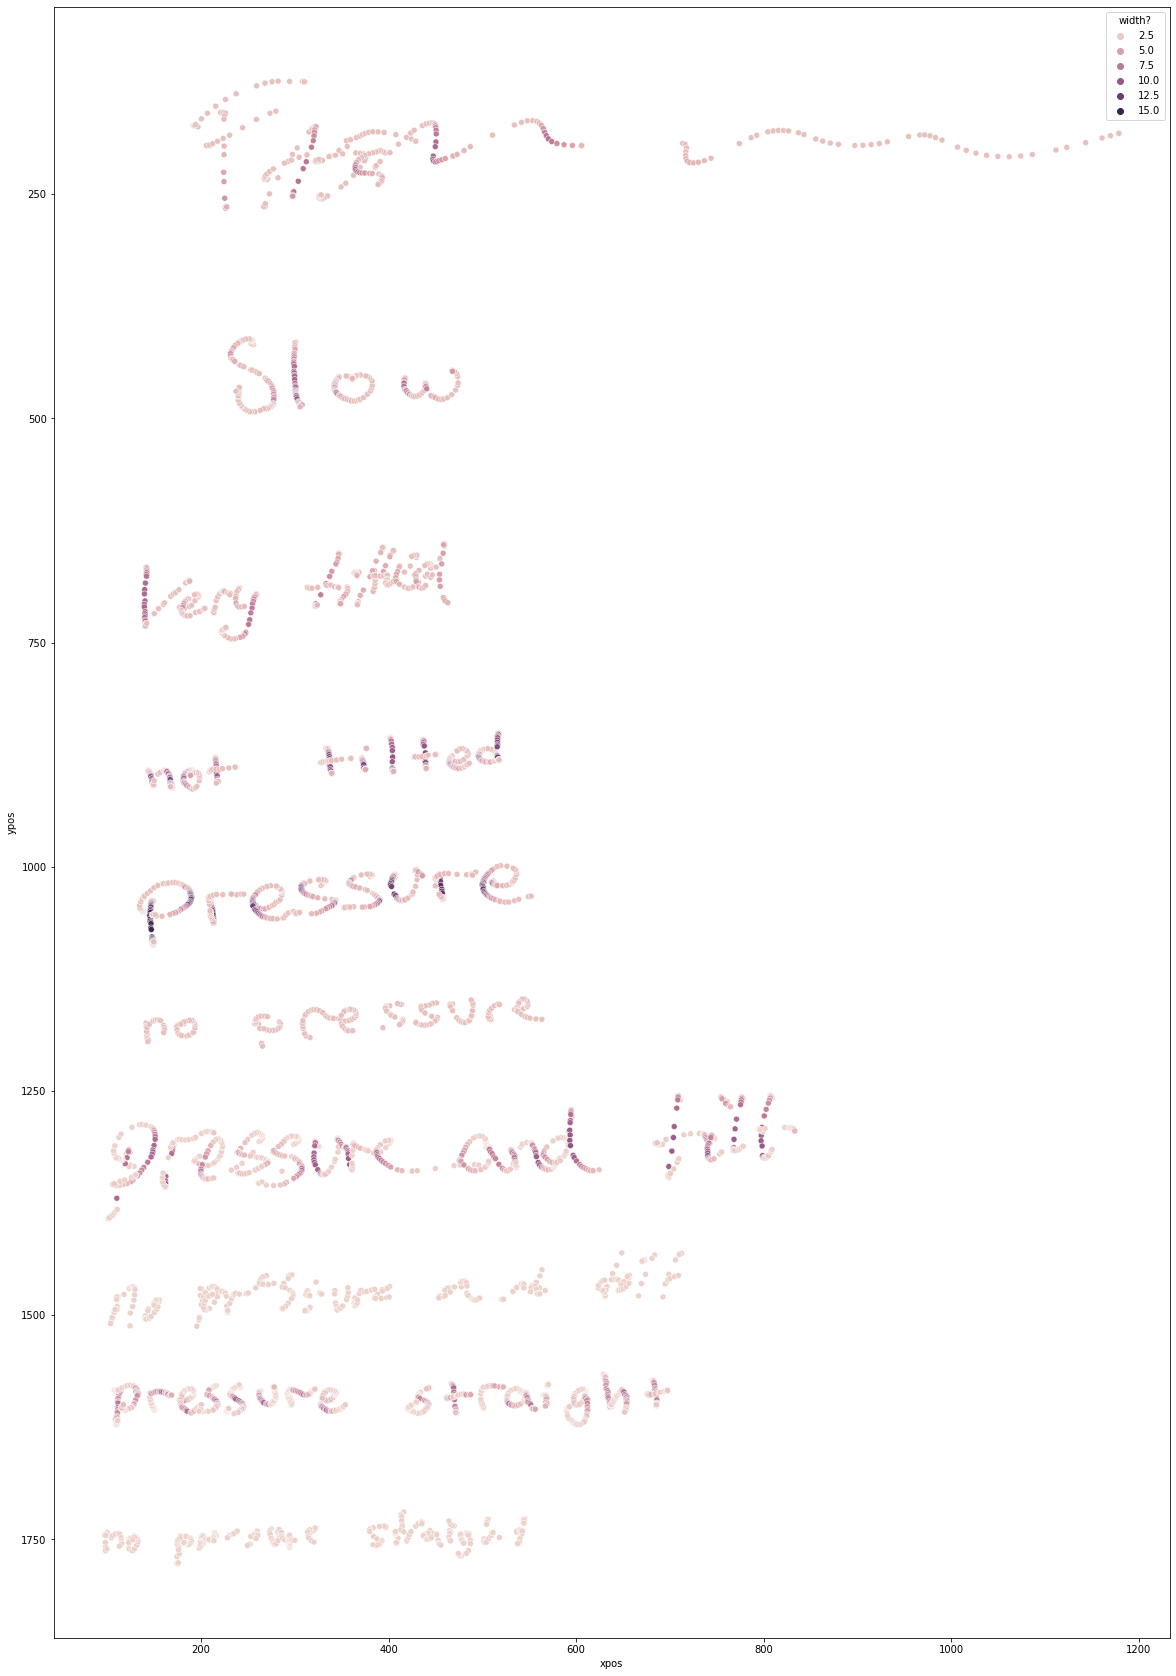

In [33]:
plt.figure(figsize=(20, 30))
sns.scatterplot(data=df, x="xpos", y="ypos", hue="width?")
plt.gca().invert_yaxis()

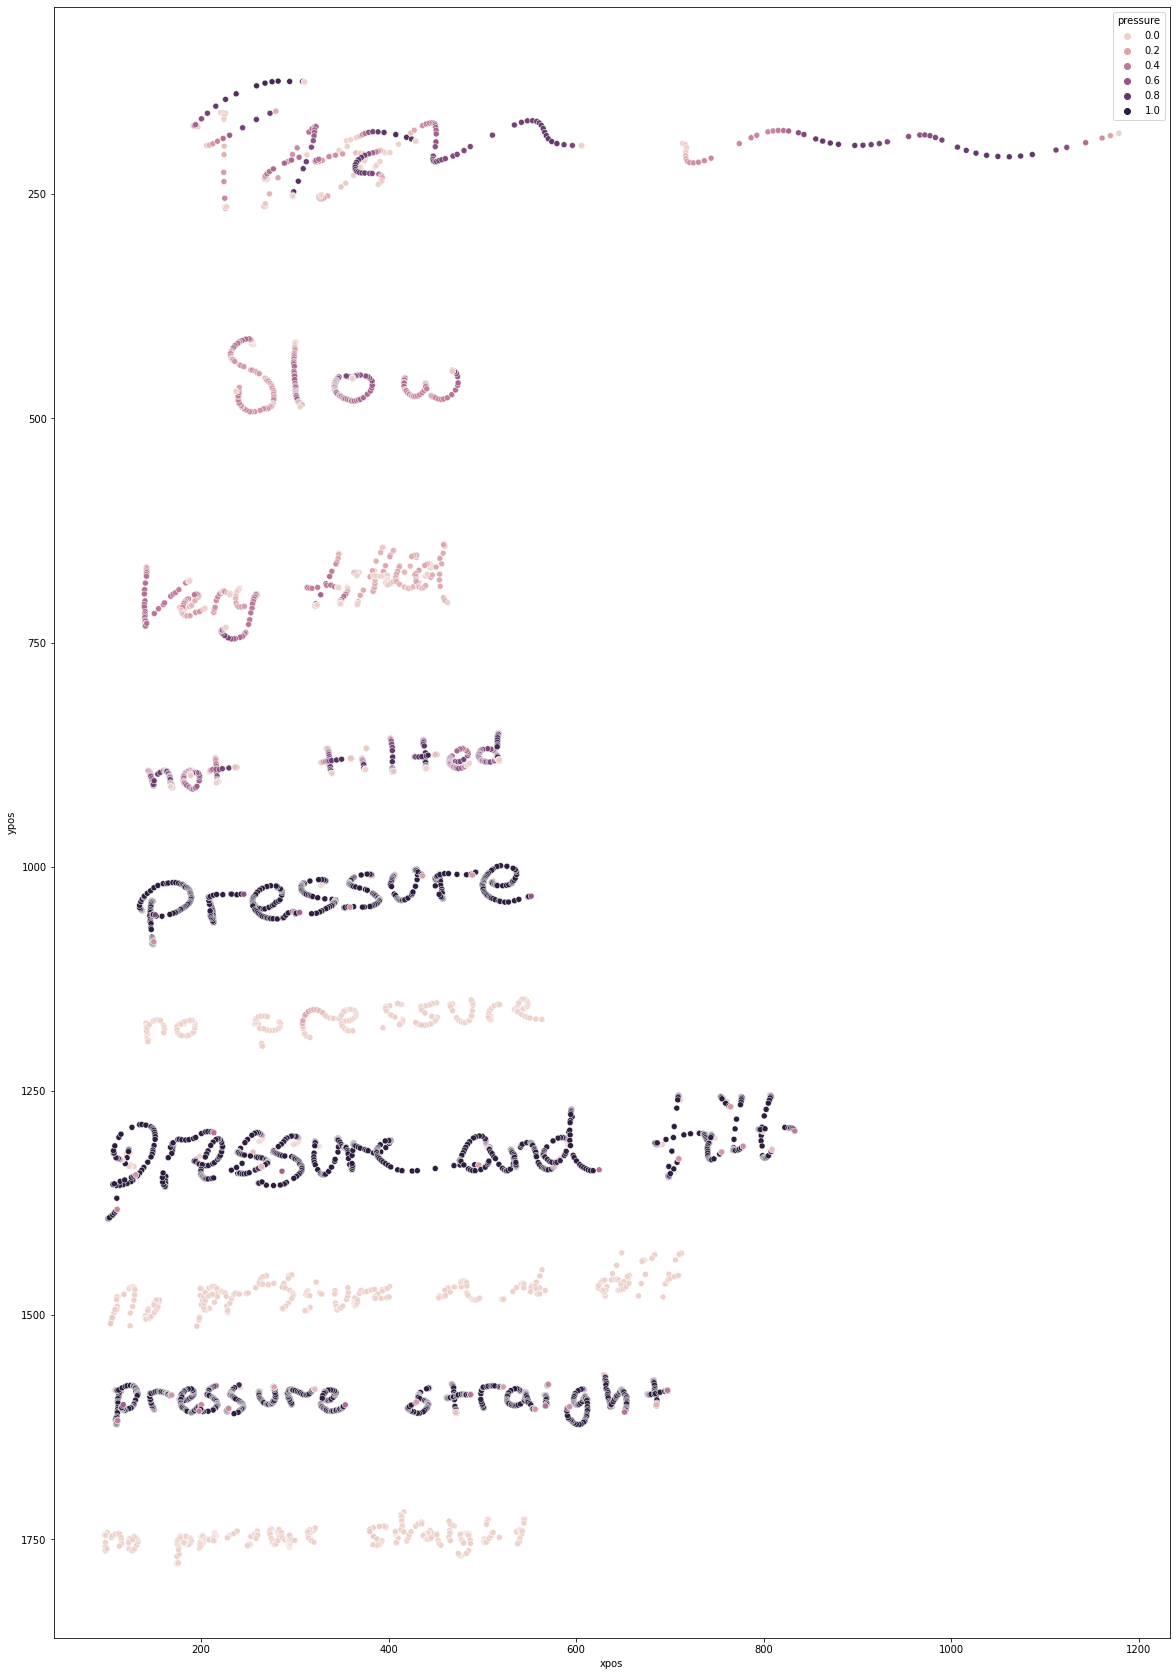

In [34]:
plt.figure(figsize=(20, 30))
sns.scatterplot(data=df, x="xpos", y="ypos", hue="pressure")
plt.gca().invert_yaxis()

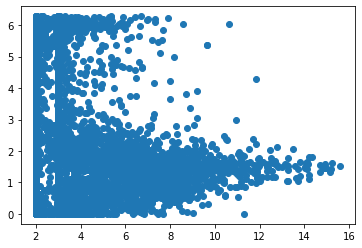

In [35]:
plt.scatter(df["width?"], df["tilt?"])

# Opacity?

In [36]:
df = pd.DataFrame(pages[2], columns = ["pen", "colour", "unknown1", "base_width", "unknown2", "nsegments", "xpos", "ypos", "speed", "tilt?", "width?", "pressure"])  

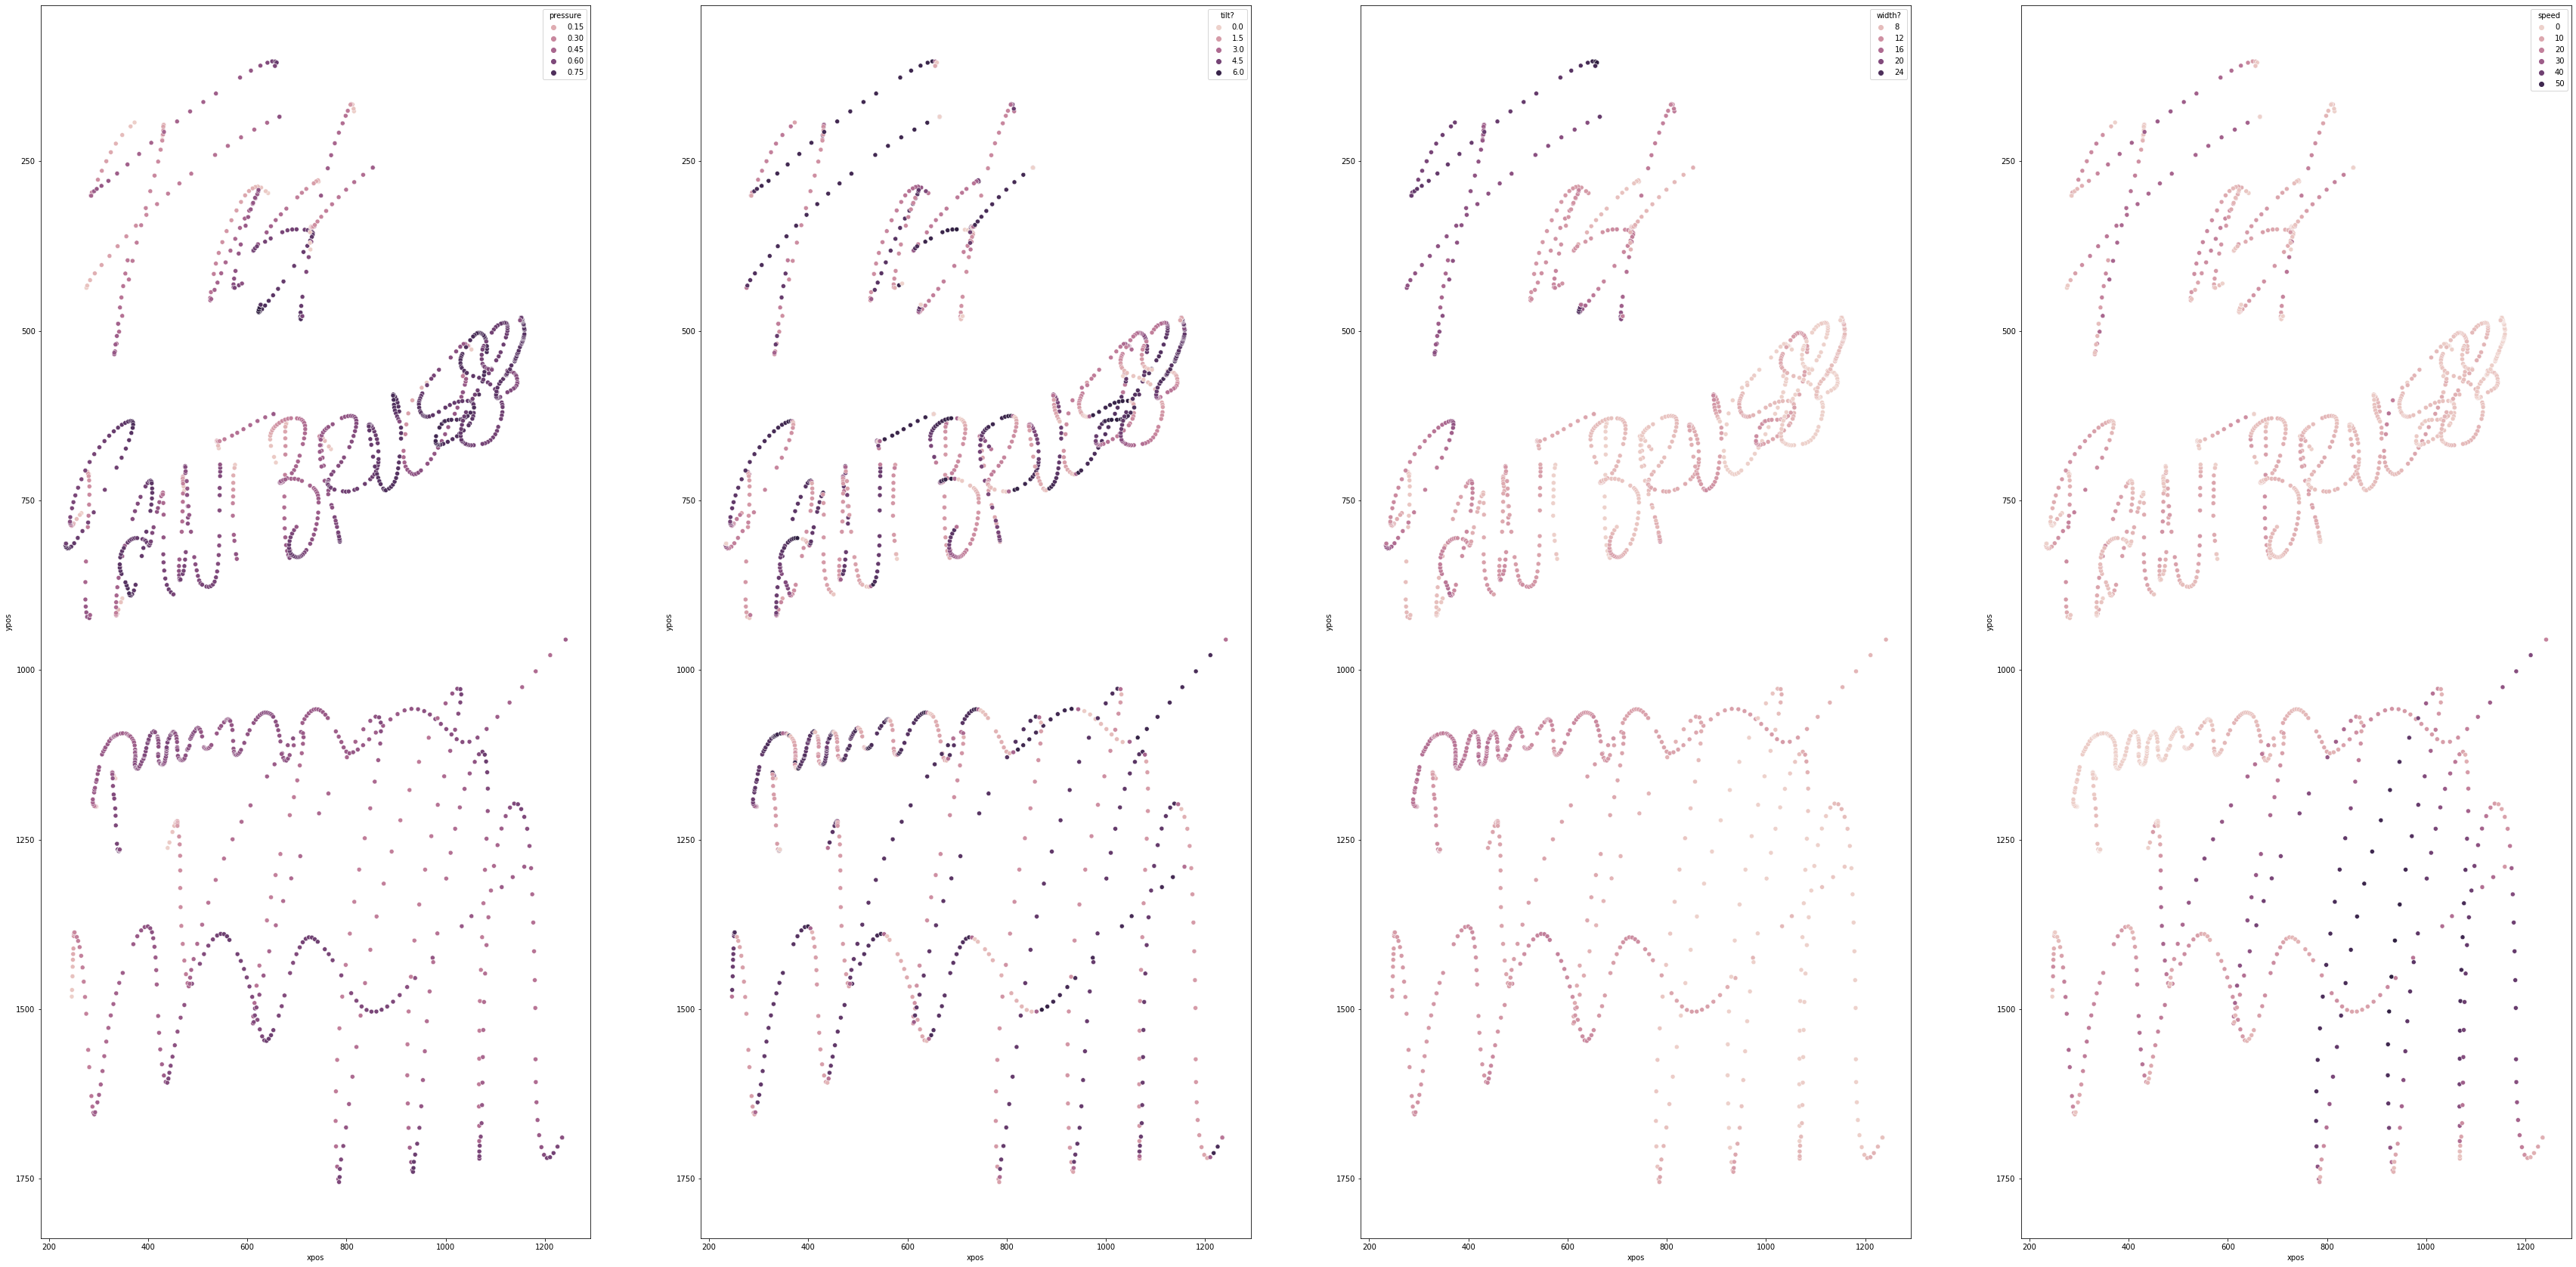

In [37]:
fig, ax = plt.subplots(1,4, figsize=(60, 30))
sns.scatterplot(data=df, x="xpos", y="ypos", hue="pressure", ax=ax[0])
sns.scatterplot(data=df, x="xpos", y="ypos", hue="tilt?", ax=ax[1])
sns.scatterplot(data=df, x="xpos", y="ypos", hue="width?", ax=ax[2])
sns.scatterplot(data=df, x="xpos", y="ypos", hue="speed", ax=ax[3])
ax[0].invert_yaxis()
ax[1].invert_yaxis()
ax[2].invert_yaxis()
ax[3].invert_yaxis()

# Overall max and min

In [38]:
my_frame = pd.DataFrame()
for i, pg in enumerate(pages):
  if i == 0:
    my_frame = pd.DataFrame(pg, columns = ["pen", "colour", "unknown1", "base_width", "unknown2", "nsegments", "xpos", "ypos", "speed", "tilt", "width", "pressure"])
  else:
    fr = pd.DataFrame(pg, columns = ["pen", "colour", "unknown1", "base_width", "unknown2", "nsegments", "xpos", "ypos", "speed", "tilt", "width", "pressure"])
    my_frame.append(fr)

In [39]:
my_frame.min()

pen           12.000000
colour         0.000000
unknown1       0.000000
base_width     1.875000
unknown2       0.000000
nsegments      3.000000
xpos           0.000000
ypos          29.331457
speed          0.000000
tilt           0.000000
width          1.500000
pressure       0.000000
dtype: float64

In [40]:
my_frame.max()

pen             21.000000
colour           0.000000
unknown1         0.000000
base_width       2.125000
unknown2         0.000000
nsegments      409.000000
xpos          1335.430054
ypos          1838.846558
speed           34.383911
tilt             6.282166
width           24.589735
pressure         1.000000
dtype: float64